In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
# -----------------------------

# 1) 데이터 준비

# -----------------------------
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "label"]
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2025ML+DL Programming/dataset/diabetes.csv").drop(columns=["Outcome"])

X = df.drop("BMI", axis=1)
y = df["BMI"]

In [ ]:
y

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = y.copy()

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

model = models.Sequential([
    layers.Dense(120, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(120, activation="relu"),
    layers.Dense(1)   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="mse",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0000e+00 - loss: 1070.1893 - val_accuracy: 0.0000e+00 - val_loss: 802.2480
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 684.7444 - val_accuracy: 0.0000e+00 - val_loss: 300.3915
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 219.9029 - val_accuracy: 0.0000e+00 - val_loss: 107.7832
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 96.2564 - val_accuracy: 0.0000e+00 - val_loss: 82.1397
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 83.5870 - val_accuracy: 0.0000e+00 - val_loss: 78.7434
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 84.4263 - val_accuracy: 0.0000e+00 - val_loss: 74.7853
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 81.9035 - val_accuracy: 0.0000e+00 - val_loss: 71.2321
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

In [ ]:
y_pred = model.predict(X_test).ravel()  # 예측된 BMI 값 (실수)
# 평가 지표 예시

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
import numpy as np
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 47.839203825729584
R-squared: 0.1940117448466312
Root Mean Squared Error: 6.916589031143139


In [ ]:
print(y_pred[:5])
print(y_test[:5])

[45.24181  32.310776 24.702135 24.960918 29.493486]
661    42.9
122    33.6
113    34.0
14     25.8
529    24.6
Name: BMI, dtype: float64


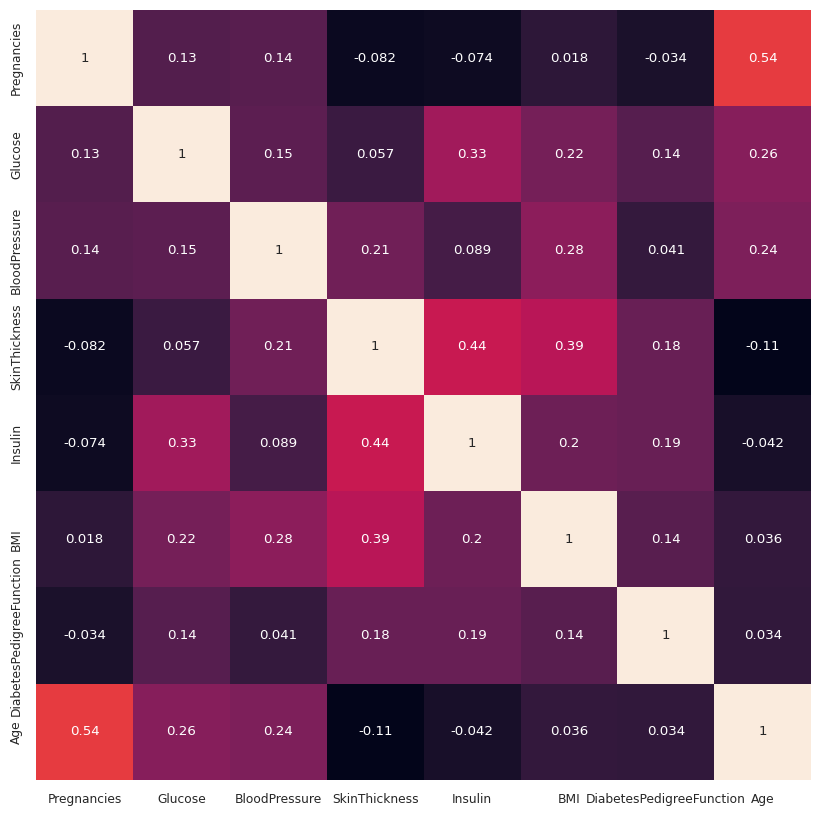

In [191]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc